# Black-Scholes Model for Vanilla Options

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..") 
from src.black_scholes import BlackScholes

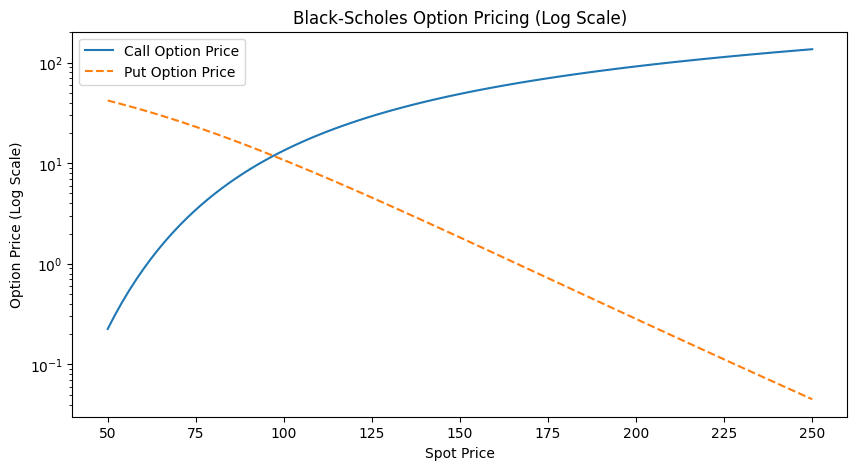

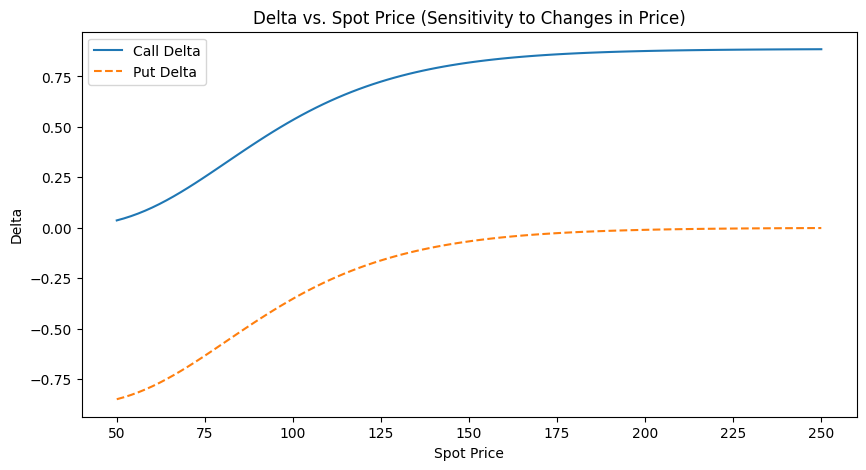

In [13]:
# Define parameters
spot_prices = np.linspace(50, 250, 100)  # Spot price range 80-->150 (by 10 units)
strike_price = 100
time_to_maturity = 3 
volatility = 0.2 # Constant Volatility in BS
domestic_rate = 0.05
foreign_rate = 0.04

# Initialize arrays
call_prices = []
put_prices = []
call_deltas = []
put_deltas = []

# Compute prices and deltas
for S in spot_prices:
    bs_model = BlackScholes(S, strike_price, time_to_maturity, volatility, domestic_rate, foreign_rate)
    call_prices.append(bs_model.calculate_vanilla_price('call'))
    put_prices.append(bs_model.calculate_vanilla_price('put'))
    call_deltas.append(bs_model.delta('call'))
    put_deltas.append(bs_model.delta('put'))

# Plot Option Prices (Log Scale)
plt.figure(figsize=(10, 5))
plt.plot(spot_prices, call_prices, label="Call Option Price", linestyle="-")
plt.plot(spot_prices, put_prices, label="Put Option Price", linestyle="dashed")
plt.yscale("log")
plt.xlabel("Spot Price")
plt.ylabel("Option Price (Log Scale)")
plt.title("Black-Scholes Option Pricing (Log Scale)")
plt.legend()
plt.show()

# Plot Delta vs. Spot Price
plt.figure(figsize=(10, 5))
plt.plot(spot_prices, call_deltas, label="Call Delta", linestyle="-")
plt.plot(spot_prices, put_deltas, label="Put Delta", linestyle="dashed")
plt.xlabel("Spot Price")
plt.ylabel("Delta")
plt.title("Delta vs. Spot Price (Sensitivity to Changes in Price)")
plt.legend()
plt.show()


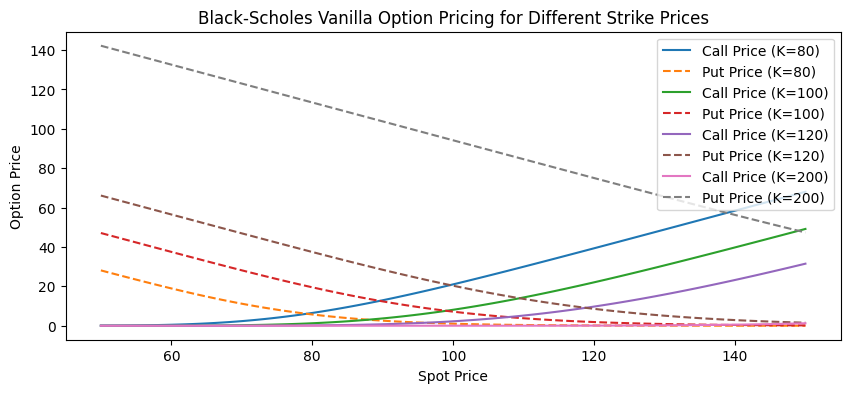

In [15]:
# Define parameters with multiple strike prices
spot_prices = np.linspace(50, 150, 100)  # Spot price range
strike_prices = [80, 100, 120, 200]  # Different strike prices to analyze
time_to_maturity = 1
volatility = 0.2 # # Constant Volatility in BS
domestic_rate = 0.05
foreign_rate = 0.04

# Initialize dictionaries to store results
call_prices = {K: [] for K in strike_prices}
put_prices = {K: [] for K in strike_prices}
call_deltas = {K: [] for K in strike_prices}
put_deltas = {K: [] for K in strike_prices}

# Compute prices and deltas for each strike price
for S in spot_prices:
    for K in strike_prices:
        bs_model = BlackScholes(S, K, time_to_maturity, volatility, domestic_rate, foreign_rate)
        call_prices[K].append(bs_model.calculate_vanilla_price("call"))
        put_prices[K].append(bs_model.calculate_vanilla_price("put"))
        call_deltas[K].append(bs_model.delta("call"))
        put_deltas[K].append(bs_model.delta("put"))

# Plot Option Prices for Different Strike Prices
plt.figure(figsize=(10, 4))
for K in strike_prices:
    plt.plot(spot_prices, call_prices[K], label=f"Call Price (K={K})", linestyle="-")
    plt.plot(spot_prices, put_prices[K], label=f"Put Price (K={K})", linestyle="dashed")
plt.xlabel("Spot Price")
plt.ylabel("Option Price")
plt.title("Black-Scholes Vanilla Option Pricing for Different Strike Prices")
plt.legend()
plt.show()




### **Graph: Option Prices vs. Spot Price**
This graph shows how the **Call and Put option prices** change as the **Spot Price** moves, for different **Strike Prices (K = 80, 100, 120, 200)**.

#### **Call Option Pricing Behavior**
1. **Lower Strike Prices (e.g., K=80) → Higher Call Prices**:
  - Calls with lower strikes are already **deep in the money** at lower spot prices.
  - As the spot price increases, these call options become **even more valuable**.
  
2. **Higher Strike Prices (e.g., K=200) → Lower Call Prices**:
  - Calls with high strikes (e.g., K=200) are **out of the money** for most spot prices.
  - Their price remains very low unless the spot price approaches the strike.

3. **Smooth Convex Shape**:
  - This follows the Black-Scholes formula, which assumes **log-normal distribution** of prices and **constant volatility**.
  - The **increase in call price is not linear**, because the probability of finishing in-the-money changes dynamically.

#### **Put Option Pricing Behavior**
1. **Higher Strike Prices (e.g., K=120, 200) → Higher Put Prices**:
  - A put with K=200 is **deep in-the-money** at lower spot prices, so it's **very expensive**.
  - As the spot price rises, these put options lose value quickly.

2. **Lower Strike Prices (e.g., K=80) → Lower Put Prices**:
  - A put with K=80 has little intrinsic value at high spot prices.
  - Its price approaches **zero** as the spot price increases above K=80.

3. **Linear-like Decline in Put Prices**:
  - The price decay is smoother compared to calls because **deep in-the-money puts behave like bonds**.

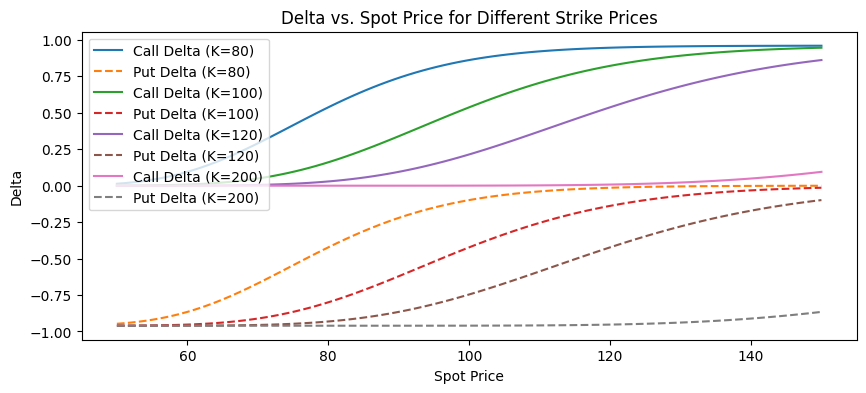

In [16]:
# Plot Delta vs. Spot Price for Different Strike Prices
plt.figure(figsize=(10, 4))
for K in strike_prices:
    plt.plot(spot_prices, call_deltas[K], label=f"Call Delta (K={K})", linestyle="-")
    plt.plot(spot_prices, put_deltas[K], label=f"Put Delta (K={K})", linestyle="dashed")
plt.xlabel("Spot Price")
plt.ylabel("Delta")
plt.title("Delta vs. Spot Price for Different Strike Prices")
plt.legend()
plt.show()

### **Graph: Delta vs. Spot Price**
This graph shows the **sensitivity (Delta)** of each option to small changes in the spot price.

#### **Call Option Delta Behavior**
1. **Deep in-the-money Calls (K=80) → Delta Approaching 1**:
  - When an option is deep **in-the-money**, its price **moves nearly 1:1** with the underlying asset.
  - Delta **saturates near 1** as spot prices increase significantly above the strike price.

2. **At-the-Money Calls (K=100) → Delta ≈ 0.5**:
  - When **spot ≈ strike**, the call option has a **50-50 probability of expiring in or out of the money**.
  - Delta for an at-the-money call is **around 0.5**.

3. **Out-of-the-Money Calls (K=200) → Delta Close to 0**:
  - If the spot price is far below K=200, the probability of the call expiring in-the-money is very low.
  - This explains why delta is **close to zero** in this region.

#### **Put Option Delta Behavior**
1. **Deep in-the-money Puts (K=200) → Delta Approaching -1**:
  - When a put is deep in-the-money, it **moves nearly 1:1 in the opposite direction** of the underlying.
  - Thus, Delta **approaches -1**.

2. **At-the-Money Puts (K=100) → Delta ≈ -0.5**:
  - If the spot price is near K=100, there's an equal chance of finishing in or out of the money.
  - Delta for an **at-the-money put is around -0.5**.

3. **Out-of-the-Money Puts (K=80) → Delta Close to 0**:
  - A put with K=80 has almost **no sensitivity** to price changes when the spot price is much higher.
  - Delta **approaches zero** in this case.


### **Why This Behavior?**
1. **Delta follows the theoretical shape from Black-Scholes**:
   - Calls have **increasing delta** with rising spot price.
   - Puts have **decreasing delta** with rising spot price.

2. **In-the-money options behave more like stock movements (delta near ±1)**:
   - Deep ITM calls behave **like holding shares**.
   - Deep ITM puts behave **like shorting shares**.

3. **Out-of-the-money options have little sensitivity (delta near 0)**:
   - The probability of them expiring in the money is very low, so delta is almost **zero**.


### **Key Takeaways**
✔ **Lower strike prices → Higher Call Prices, Lower Put Prices**.  
✔ **Higher strike prices → Higher Put Prices, Lower Call Prices**.  
✔ **Deep ITM options → Delta near ±1, OTM options → Delta near 0**.  
✔ **At-the-money options (spot ≈ strike) → Delta ~0.5 for calls, -0.5 for puts**.  